In [2]:
import pandas as pd
try:
    import plotly.express as px
except ImportError:
    print("plotly.express is not installed")
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


plotly.express is not installed


In [8]:
medical_df = pd.read_csv("data.csv")
#medical_df = medical_df.dropna()

In [9]:
medical_df

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


In [12]:
medical_df = medical_df.dropna()


In [13]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164 entries, 0 to 168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  164 non-null    int64  
 1   Pulse     164 non-null    int64  
 2   Maxpulse  164 non-null    int64  
 3   Calories  164 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 6.4 KB


In [14]:
medical_df.describe()


,Duration,Pulse,Maxpulse,Calories
count,164.000000,164.000000,164.00000,164.000000
mean,64.146341,107.676829,134.27439,375.790244
std,42.888820,14.637516,16.58306,266.379919
min,15.000000,80.000000,100.00000,50.300000
25%,45.000000,100.000000,124.00000,250.925000
50%,60.000000,105.500000,131.00000,318.600000
75%,60.000000,111.000000,143.00000,387.600000
max,300.000000,159.000000,184.00000,1860.400000


Below is a code trying to drop the null values

Duration and the amount o calories have a strong correlation. Meaning that if one increases
the amount of time in the gym the more he or she will burn alot of calories

In [15]:
medical_df.Duration.corr(medical_df.Calories)

0.9227166783472469

Purse rate and the amount wof calories one burns have very weak relationship meaning thir correlation approches to zero(0) 

In [16]:
medical_df.Pulse.corr(medical_df.Calories)

0.025121130626710283

Duratio and Pulse have a weak negative correlation meaning when one increases the other decreases 

In [17]:
medical_df.Duration.corr(medical_df.Pulse)

-0.16066051954191013

Below is a table showing all the relationship between the valuebles in the data set.

In [18]:
medical_df.corr()

,Duration,Pulse,Maxpulse,Calories
Duration,1.000000,-0.160661,0.005679,0.922717
Pulse,-0.160661,1.000000,0.784631,0.025121
Maxpulse,0.005679,0.784631,1.000000,0.203813
Calories,0.922717,0.025121,0.203813,1.000000


Text(0.5, 1.0, 'Correlation Matrix Heatmap')

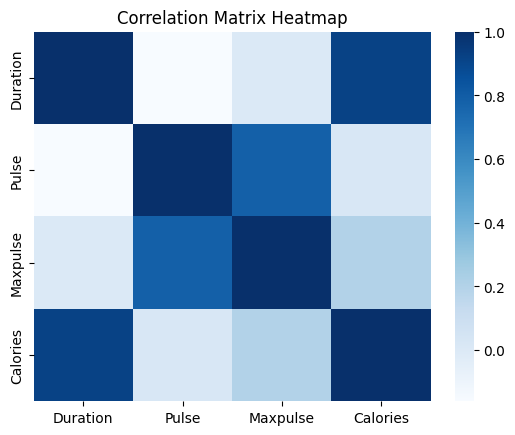

In [19]:
sns.heatmap(medical_df.corr(), cmap="Blues")
plt.title("Correlation Matrix Heatmap")


The estimate calories function is my very first model

In [21]:
def estimate_calories (Duration, w, b):
    return w * Duration + b

Lets guess the values of w and b and use the to estimate the amount of calories being burnt when one visit the gym for a certain amount of time

In [22]:
w = 50
b = 100


In [23]:
Durations = medical_df.Duration
Durations


0      60
1      60
2      60
3      45
4      45
       ..
164    60
165    60
166    60
167    75
168    75
Name: Duration, Length: 164, dtype: int64

In [24]:
estimate_calories = estimate_calories(Durations, w, b)

Text(0, 0.5, 'estimate_calories')

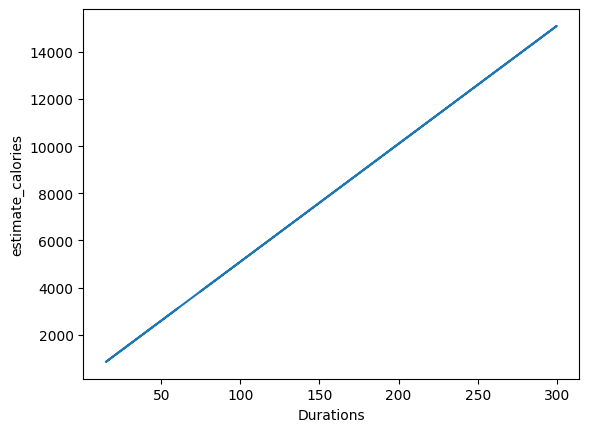

In [25]:
plt.plot(Durations, estimate_calories)
plt.xlabel("Durations")
plt.ylabel("estimate_calories")

<function matplotlib.pyplot.show(close=None, block=None)>

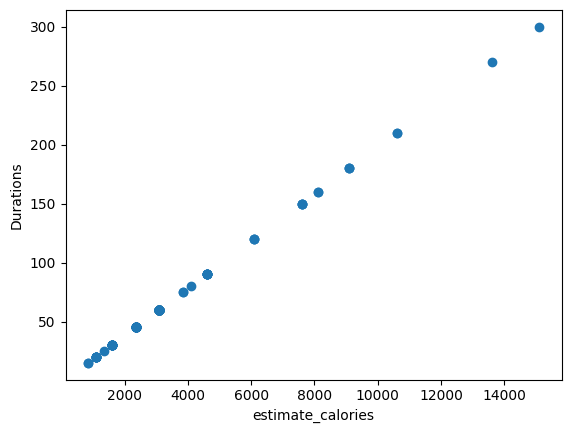

In [31]:
plt.scatter(estimate_calories,Durations)
plt.xlabel("estimate_calories")
plt.ylabel("Durations")
plt.show

As expected the points lie on a straight line

In [39]:
pip install scikit-learn 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
model = LinearRegression()

In [49]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [51]:
input = medical_df[["Duration"]]
Target = medical_df.Calories


In [52]:
print(input.shape)
print(Target.shape)

(164, 1)
(164,)


In [54]:
model.fit(input, Target)

LinearRegression()

In [59]:
import numpy as np
model.predict(np.array([[35],[10],[75]]))

c:\Users\Kinyua Moses\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([208.7543488 ,  65.48088229, 437.99189522])

In [61]:
predictions = model.predict(input)

In [62]:
print(predictions)

[ 352.02781531  352.02781531  352.02781531  266.0637354   266.0637354
  352.02781531  352.02781531  266.0637354   180.0996555   352.02781531
  352.02781531  352.02781531  352.02781531  352.02781531  352.02781531
  352.02781531  352.02781531  352.02781531  266.0637354   352.02781531
  266.0637354   352.02781531  266.0637354   352.02781531  352.02781531
  352.02781531  352.02781531  352.02781531  352.02781531  266.0637354
  352.02781531  352.02781531  352.02781531  352.02781531  352.02781531
  352.02781531  352.02781531  266.0637354   266.0637354   352.02781531
  352.02781531  352.02781531  352.02781531  352.02781531  352.02781531
  266.0637354   266.0637354   352.02781531  352.02781531  466.64658852
  352.02781531  352.02781531  180.0996555   352.02781531  352.02781531
  266.0637354   122.79026889  266.0637354  1211.66861438  925.12168136
  925.12168136  266.0637354   122.79026889 1039.74045457  867.81229475
  867.81229475  122.79026889 1727.45309382  867.81229475  352.02781531
  523.95

In [69]:

def rmse(Target, predictions):
    return(rmse)
print(rmse)

<function rmse at 0x0000028BD9456020>


In [70]:
model.coef_

array([5.73093866])

In [73]:
model.intercept_

8.171495682519833

In [75]:
def try_parameters(coef, intercept):
	print(f"Model Coefficients: {coef}")
	print(f"Model Intercept: {intercept}")

try_parameters(model.coef_, model.intercept_)

Model Coefficients: [5.73093866]
Model Intercept: 8.171495682519833
